In [1]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def rebin(array_like, old_bins_per_new_bin):
    N = len(array_like)
    rebinned_list = []
    for i in range(round(N/old_bins_per_new_bin)):
        new_element = 0
        for j in range(old_bins_per_new_bin):
            new_element += array_like[old_bins_per_new_bin*i+j]
        new_element /= old_bins_per_new_bin # Sets the first bin's probability to 1.
        rebinned_list.append(new_element)
    rebinned_array = np.array(rebinned_list)
    return rebinned_array

# Experiment binned at 1kb, old sims at 5kb (per bead), new sims at 500bp (per bead)
# To get the same bin size of 5kb for all of them, rebin accordingly:
#                                                         old_bins_per_new_bin = 5  for experiment
#                                                         old_bins_per_new_bin = 1  for old sims
#                                                         old_bins_per_new_bin = 10  for new sims

In [3]:
def rescale(array_like, pos):
    array_like /= array_like[pos]
    return array_like

In [4]:
def load_rebin_rescale(file_name,old_bins_per_new_bin = 1, pos = 1):
    return rescale(rebin(np.loadtxt(file_name), old_bins_per_new_bin), pos)

### Load experimental data

In [5]:
# Cis
exp_cis_path = '/Users/douglas/Documents/Features Transfer/figures/chr2_1kbRes_cis_P_vs_d.txt'
P_cis_experiment = load_rebin_rescale(exp_cis_path,5,1)
#P_cis_experiment = np.loadtxt(exp_cis_path) # Average experimental contact probability versus genomic distance. I omit nan datapoints at the beginning.
#P_cis_experiment = rebin(P_cis_experiment,old_bins_per_new_bin = 5)
#P_cis_experiment /= np.max(P_cis_experiment) # This makes experimental data resemble a vector of probabilities (not to be confused with a PMF or a PDF).

# Trans
exp_trans_path = '/Users/douglas/Documents/Features Transfer/figures/chr2_1kbRes_trans_P_vs_d.txt'
P_trans_experiment = load_rebin_rescale(exp_trans_path,5,1)


#P_trans_experiment = np.loadtxt(exp_trans_path) # Average experimental contact probability versus genomic distance. I omit nan datapoints at the beginning. 
#P_trans_experiment = rebin(P_trans_experiment,old_bins_per_new_bin = 5)
#P_trans_experiment /= np.max(P_trans_experiment) 

### Load simulation P vs d data

In [6]:
sim_path = '/Users/douglas/Documents/Features Transfer/store_Ps_vs_genomic_graphs/'

# Simulation identifying numbers
old_sims = [1,2]
new_sims = [59,68]+[i for i in range(75,86)]

# Lists of file names
old_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in old_sims]
old_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in old_sims]
new_cis_file_names = [sim_path+f'PvsGenomic_directory_{i}.txt' for i in new_sims]
new_trans_file_names = [sim_path+f'transPvsGenomic_directory_{i}.txt' for i in new_sims]

# Load the files into an array (of arrays) 
old_cis_matrices = [load_rebin_rescale(file_name) for file_name in old_cis_file_names]
new_cis_matrices = [load_rebin_rescale(file_name, 10) for file_name in new_cis_file_names]
old_trans_matrices = [load_rebin_rescale(file_name) for file_name in old_trans_file_names]
new_trans_matrices = [load_rebin_rescale(file_name, 10) for file_name in new_trans_file_names]

# Organize data into variables
#P_cis_simulation_1, P_cis_simulation_2, P_cis_simulation_59, P_cis_simulation_68, P_cis_simulation_75, P_cis_simulation_76, P_cis_simulation_77, P_cis_simulation_78, P_cis_simulation_79, P_cis_simulation_80, P_cis_simulation_81, P_cis_simulation_82, P_cis_simulation_83, P_cis_simulation_84, P_cis_simulation_85 = cis_matrices
#P_trans_simulation_1, P_trans_simulation_2, P_trans_simulation_59, P_trans_simulation_68, P_trans_simulation_75, P_trans_simulation_76, P_trans_simulation_77, P_trans_simulation_78, P_trans_simulation_79, P_trans_simulation_80, P_trans_simulation_81, P_trans_simulation_82, P_trans_simulation_83, P_trans_simulation_84, P_trans_simulation_85 = trans_matrices

### Make genomic distance arrays

In [7]:
N_exp = len(P_cis_experiment)
N_old_sim = len(old_cis_matrices[0])
N_new_sim = len(new_cis_matrices[0])

# 5* makes each bin 5kb
d_exp = 5*np.arange(N_exp)
d_old_sim = 5*np.arange(N_old_sim)
d_new_sim = 5*np.arange(N_new_sim)

## Plots

/var/folders/yg/xmt_zsl154zd8l51xlg5s_s40000gn/T/ipykernel_8685/2058978813.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-1,3000)


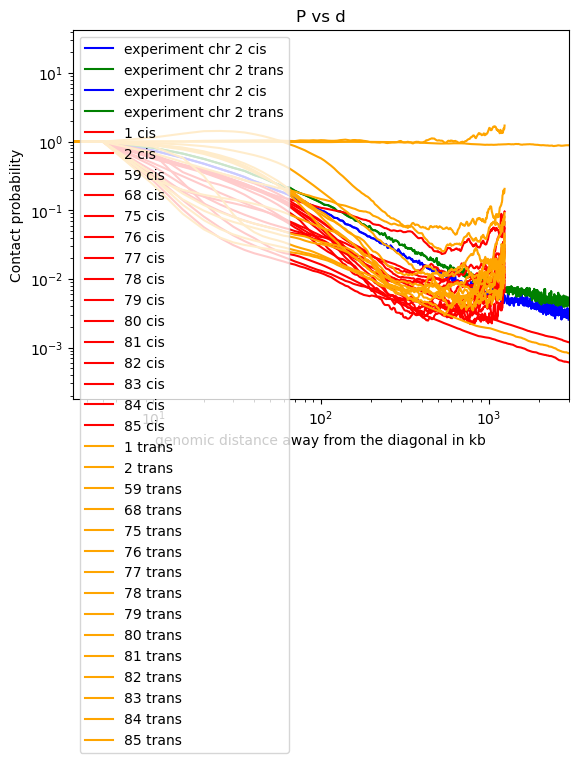

In [8]:
# Plot experimental P vs d
plt.plot(d_exp, P_cis_experiment, label='experiment chr 2 cis', color='blue')
plt.plot(d_exp, P_trans_experiment, label='experiment chr 2 trans',color = 'green')

# Plot experimental P vs d
plt.plot(d_exp, P_cis_experiment, label='experiment chr 2 cis', color='blue')
plt.plot(d_exp, P_trans_experiment, label='experiment chr 2 trans',color = 'green')

for i in range(len(old_sims)):
    plt.plot(d_old_sim, old_cis_matrices[i], label=str(old_sims[i])+' cis ', color = 'red')

for i in range(len(new_sims)):
    plt.plot(d_new_sim, new_cis_matrices[i], label=str(new_sims[i])+' cis ', color = 'red')

for i in range(len(old_sims)):
    plt.plot(d_old_sim, old_trans_matrices[i], label=str(old_sims[i])+' trans ', color = 'orange')

for i in range(len(new_sims)):
    plt.plot(d_new_sim, new_trans_matrices[i], label=str(new_sims[i])+' trans ', color = 'orange')

# Plot settings
plt.title('P vs d')
plt.legend()
plt.xlabel('genomic distance away from the diagonal in kb')
plt.xscale('log')
plt.xlim(-1,3000)
plt.ylabel('Contact probability')
plt.yscale('log')